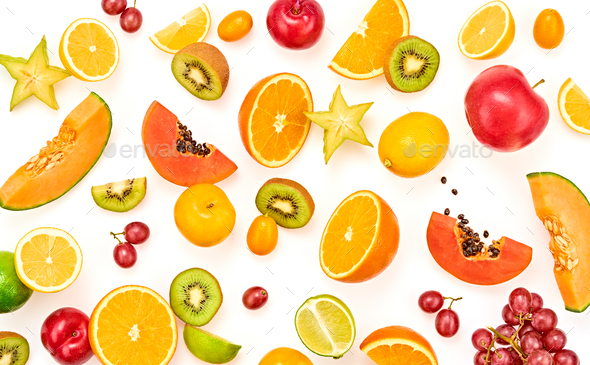

#Fruit Classification Project: Predicting Fruit Labels with Machine Learning

#Problem Statement:

The "Fruit Classification Project" aims to develop and implement a machine learning solution to predict the labels of various fruits based on their visual characteristics. The primary challenge is to create an accurate and reliable classification model that can assist in automating fruit identification for a range of potential applications, including agriculture, food processing, and retail.

By the end of this project, we aim to provide a robust and accurate fruit classification system that can be applied to various real-world scenarios, improving efficiency and accuracy in fruit identification while considering ethical and practical implications.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from statistics import mode
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

In [ ]:

df = pd.read_table('fruit_data_with_colors.txt')
df.head(2)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59


In [ ]:
df.shape

(59, 7)

The dataset consists of 59 rows and 7 columns, which is relatively small in size. To ensure a proper split for training and testing, it's recommended to allocate 70-75% of the data for training and the remaining 25-30% for testing.

After applying a classification model to this data, it's important to assess whether the model is overfitting or underfitting. Overfitting occurs when the model fits the training data too closely, capturing noise and making it perform poorly on new, unseen data. Underfitting, on the other hand, occurs when the model is too simplistic and fails to capture the underlying patterns in the data, resulting in poor performance.



In [ ]:
df.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

Now understanding of each column's data type and its role in the dataset:

- 'fruit_label' is represented as an int64 data type and serves as the label encoding column.
- 'fruit_name' is recorded as an object data type and corresponds to the name of different types of fruits.
- 'fruit_subtype' is an object data type, indicating the specific category or subset of a given fruit.
- 'mass' is an int64 data type, denoting the weight of the fruit.
- 'width' is a float64 data type, representing the shortest horizontal dimension of the fruit.
- 'height' is a float64 data type, measuring the length of the fruit.
- 'color_score' is a float64 data type, quantifying the measurement of the fruit's color.



In [ ]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

The absence of null values in the dataset is indeed favorable for predictive modeling, as missing data can lead to inaccuracies in the analysis. When there are no null values, it simplifies data preparation and ensures that the dataset is complete and ready for modeling.Not needing to remove or replace data in the dataset can save time and effort.



In [ ]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

<ipython-input-1522-5a9ac943ced5>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(df['fruit_name'].unique()))
<ipython-input-1522-5a9ac943ced5>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(group['mass'], group['width'], group['height'], label=name, marker='o', cmap=colormap, s=50)


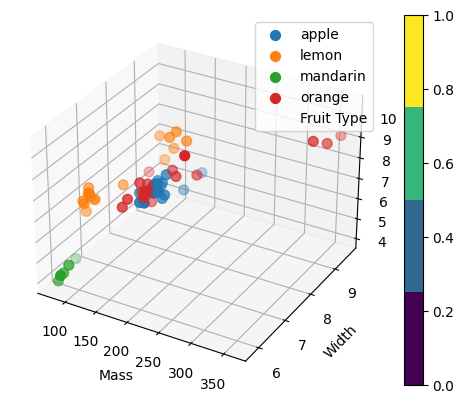

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a colormap for different colors
colormap = plt.cm.get_cmap('viridis', len(df['fruit_name'].unique()))

# Group the data by 'fruit_name'
groups = df.groupby('fruit_name')

# Plot each group with a unique color
for name, group in groups:
    ax.scatter(group['mass'], group['width'], group['height'], label=name, marker='o', cmap=colormap, s=50)

ax.set_xlabel('Mass')
ax.set_ylabel('Width')
ax.set_zlabel('Height')

# Add a colorbar to the plot
sc = ax.scatter([], [], [], c=[], cmap=colormap, label='Fruit Type')
plt.colorbar(sc)

# Add a legend to differentiate between fruit types
ax.legend()

plt.show()


In the 'fruit_name' column, there are four distinct types of fruits: Apple, Lemon, Mandarin, and Orange. These fruit categories are represented by different colors in a 3D plotting graph for the variables 'mass,' 'width,' and 'height.' Specifically, Apple is denoted by Blue, Lemon by Orange, Mandarin by Green, and Orange by Red. This color-coded representation in the 3D plot makes it significantly easier to visually distinguish and group the data points belonging to each type of fruit.

This clear differentiation by color is a valuable visual aid and can be highly beneficial for implementing machine learning (ML) models. It simplifies the process of identifying and classifying data points belonging to each fruit category, which is crucial for supervised learning tasks like classification. The distinct color-coding facilitates data exploration, feature selection, and model evaluation, ultimately contributing to the effectiveness of the ML model.

In [ ]:
print(f"Unique number of Fruit_label: {set(df['fruit_label'])}\nUnique number of Fruit_Name: {set(df['fruit_name'])}\nUnique number of Fruit_label: {set(df['fruit_subtype'])}")


Unique number of Fruit_label: {1, 2, 3, 4}
Unique number of Fruit_Name: {'mandarin', 'lemon', 'orange', 'apple'}
Unique number of Fruit_label: {'mandarin', 'turkey_navel', 'braeburn', 'cripps_pink', 'unknown', 'selected_seconds', 'spanish_jumbo', 'granny_smith', 'spanish_belsan', 'golden_delicious'}


Breakdown of the unique data values in three columns of the dataset:

- 'fruit_label' contains four unique values: 1, 2, 3, and 4.
- 'fruit_name' includes four unique fruit names: 'mandarin,' 'lemon,' 'orange,' and 'apple.'
- 'fruit_subtype' consists of ten unique subtype names: 'spanish_jumbo,' 'unknown,' 'selected_seconds,' 'spanish_belsan,' 'turkey_navel,' 'braeburn,' 'cripps_pink,' 'granny_smith,' 'golden_delicious,' and 'mandarin.'

Understanding the uniqueness of data values in these columns is essential for data analysis and modeling, as it allows for categorization, grouping, and distinguishing between different fruit types and their respective subtypes. This information can be used to create meaningful visualizations and make informed decisions during data analysis and machine learning tasks.

In [ ]:
(df['fruit_name']=='apple').sum()

19

<ipython-input-1525-56313748769d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['fruit_name'].unique(), rotation=90)  # Rotate x-axis labels for better readability
<ipython-input-1525-56313748769d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df['fruit_subtype'].unique(), rotation=90)  # Rotate x-axis labels for better readability


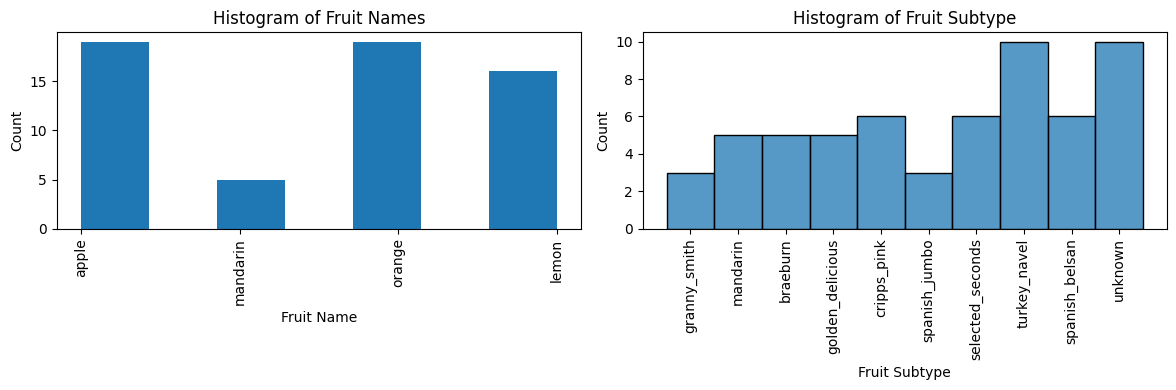

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the histogram for 'fruit_name' in the first subplot (ax1)
ax1.hist(df['fruit_name'], bins='auto')
ax1.set_xlabel('Fruit Name')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of Fruit Names')
ax1.set_xticklabels(df['fruit_name'].unique(), rotation=90)  # Rotate x-axis labels for better readability

# Plot the histogram for 'fruit_subtype' in the second subplot (ax2)
sns.histplot(df['fruit_subtype'], bins='auto', kde=False, ax=ax2)
ax2.set_xlabel('Fruit Subtype')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of Fruit Subtype')
ax2.set_xticklabels(df['fruit_subtype'].unique(), rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


Here's what the histograms might look like:

Histogram of Fruit Names:
- Apple and Orange: Same count (most frequent)
- Lemon: Second most frequent
- Mandarin: Lowest count

Histogram of Fruit Subtype:
- Turkey Navel and Unknown: Same count (most frequent)
- Cripps Pink, Selected Seconds, and Spanish Belsan: Second most frequent
- Mandarin, Braeburn, Golden Delicious: Same count (third most frequent)
- Granny Smith and Spanish Jumbo: Same count (least frequent)


In [ ]:

df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [ ]:

print('=======================================')
print("Each fruit name's 'mass' mean")
result = df.groupby('fruit_name')['mass'].mean().reset_index()
print('=======================================')
print(result)
print('=======================================')

print('=======================================')
print("Each fruit name's 'mass' median")
result = df.groupby('fruit_name')['mass'].median().reset_index()
print('=======================================')
print(result)
print('=======================================')

print('=======================================')
print("Each fruit name's 'mass' mode")
result = df.groupby('fruit_name')['mass'].apply(lambda x: mode(x)).reset_index()
print('=======================================')
print(result)
print('=======================================')


Each fruit name's 'mass' mean
  fruit_name        mass
0      apple  165.052632
1      lemon  150.000000
2   mandarin   81.200000
3     orange  193.789474
Each fruit name's 'mass' median
  fruit_name   mass
0      apple  164.0
1      lemon  131.0
2   mandarin   80.0
3     orange  160.0
Each fruit name's 'mass' mode
  fruit_name  mass
0      apple   156
1      lemon   116
2   mandarin    80
3     orange   154


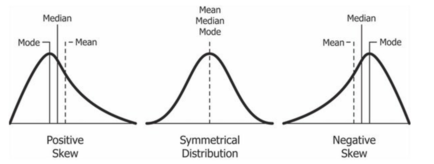

Here's a summary:

1. **Apple's mass**:
   - Mean:     165.052632
   - Median:   164.0
   - Mode:     156
   - Decision: Close to a normal distribution(Symmetrical Distribution).

2. **Lemon's mass**:
   - Mean:     150
   - Median:   131
   - Mode:     116
   - Decision: Skewed (not a normal distribution). The mean, median, and mode differ significantly.

3. **Mandarin's mass**:
   - Mean:     81.2
   - Median:   80
   - Mode:     80
   - Decision: Close to a normal distribution.

4. **Orange's mass**:
  - Mean:     193.789474
  - Median:   160.0
  - Mode:     154
  - Decision: Skewed (not a normal distribution). The mean, median, and mode differ significantly.


In [ ]:
print('=======================================')
print("Each fruit name's 'width' mean")
result = df.groupby('fruit_name')['width'].mean().reset_index()
print('=======================================')
print(result)
print('=======================================')

print("Each fruit name's 'width' median")
result = df.groupby('fruit_name')['width'].median().reset_index()
print('=======================================')
print(result)
print('=======================================')

print("Each fruit name's 'width' mode")
result = df.groupby('fruit_name')['width'].apply(lambda x: mode(x)).reset_index()
print('=======================================')
print(result)
print('=======================================')


Each fruit name's 'width' mean
  fruit_name     width
0      apple  7.457895
1      lemon  6.512500
2   mandarin  5.940000
3     orange  7.557895
Each fruit name's 'width' median
  fruit_name  width
0      apple    7.4
1      lemon    6.2
2   mandarin    5.9
3     orange    7.2
Each fruit name's 'width' mode
  fruit_name  width
0      apple    7.4
1      lemon    7.3
2   mandarin    5.8
3     orange    7.1


Here's a summary:

1. **Apple's width**:
   - Mean:     7.457895
   - Median:   7.4
   - Mode:     7.4
   - Decision: Close to a normal distribution(Symmetrical Distribution).

2. **Lemon's width**:
   - Mean:     6.512500
   - Median:   6.2
   - Mode:     7.3
   - Decision: Skewed (not a normal distribution). The mean, median, and mode differ significantly.

3. **Mandarin's width**:
   - Mean:     5.940000
   - Median:   5.9
   - Mode:     5.8
   - Decision: Close to a normal distribution.

4. **Orange's width**:
  - Mean:     7.557895
  - Median:   7.2
  - Mode:     7.1
  - Decision: Skewed (not a normal distribution). The mean, median, and mode differ significantly.

In [ ]:
print('=======================================')
print("Each fruit name's 'height' mean")
result = df.groupby('fruit_name')['height'].mean().reset_index()
print('=======================================')
print(result)
print('=======================================')

print("Each fruit name's 'height' median")
result = df.groupby('fruit_name')['height'].median().reset_index()
print('=======================================')
print(result)
print('=======================================')

print("Each fruit name's 'height' mode")
result = df.groupby('fruit_name')['height'].apply(lambda x: mode(x)).reset_index()
print('=======================================')
print(result)
print('=======================================')

Each fruit name's 'height' mean
  fruit_name    height
0      apple  7.342105
1      lemon  8.856250
2   mandarin  4.380000
3     orange  7.936842
Each fruit name's 'height' median
  fruit_name  height
0      apple     7.3
1      lemon     8.5
2   mandarin     4.3
3     orange     7.8
Each fruit name's 'height' mode
  fruit_name  height
0      apple     7.1
1      lemon     8.5
2   mandarin     4.3
3     orange     9.2


Here's a summary:

1. **Apple's height**:
  - Mean:     7.342105
  - Median:   7.3
  - Mode:     7.1
  - Decision: Close to a normal distribution(Symmetrical Distribution).

2. **Lemon's height**:
  - Mean:     8.856250
  - Median:   8.5
  - Mode:     8.5
  - Decision: Close to a normal distribution(Symmetrical Distribution).

3. **Mandarin's height**:
  - Mean:     4.380000
  - Median:   4.3
  - Mode:     4.3
  - Decision: Close to a normal distribution(Symmetrical Distribution).

4. **Orange's height**:
  - Mean:     7.936842
  - Median:   7.8
  - Mode:     9.2
  - Decision: Close to a normal distribution(Symmetrical Distribution).

In [ ]:

print("Each fruit name's 'color_score' mean")
result = df.groupby('fruit_name')['color_score'].mean().reset_index()
print('=====================================')
print(result)
print('=====================================')


print("Each fruit name's 'color_score' median")
result = df.groupby('fruit_name')['color_score'].median().reset_index()
print('=======================================')
print(result)
print('=======================================')

print("Each fruit name's 'color_score' mode")
result = df.groupby('fruit_name')['color_score'].apply(lambda x: mode(x)).reset_index()
print('=====================================')
print(result)
print('=====================================')

Each fruit name's 'color_score' mean
  fruit_name  color_score
0      apple     0.783684
1      lemon     0.718125
2   mandarin     0.796000
3     orange     0.771053
Each fruit name's 'color_score' median
  fruit_name  color_score
0      apple         0.84
1      lemon         0.72
2   mandarin         0.80
3     orange         0.77
Each fruit name's 'color_score' mode
  fruit_name  color_score
0      apple         0.92
1      lemon         0.72
2   mandarin         0.81
3     orange         0.75


Here's a summary:

1. **Apple's color_score**:
   - Mean:     0.783684
   - Median:    0.84
   - Mode:     0.92
   - Decision: Close to a normal distribution(Symmetrical Distribution).

2. **Lemon's color_score**:
   - Mean:     0.718125
   - Median:   0.72
   - Mode:     0.72
   - Decision: Close to a normal distribution(Symmetrical Distribution).

3. **Mandarin's color_score**:
   - Mean:     0.796000
   - Median:   0.80
   - Mode:     0.81
   - Decision: Close to a normal distribution.

4. **Orange's color_score**:
  - Mean:     0.771053
  - Median:   0.77
  - Mode:     0.75
  - Decision: Close to a normal distribution(Symmetrical Distribution).

In [ ]:
df.shape

(59, 7)

In [ ]:
outliers_count = {}  # To store the count of outliers for each column

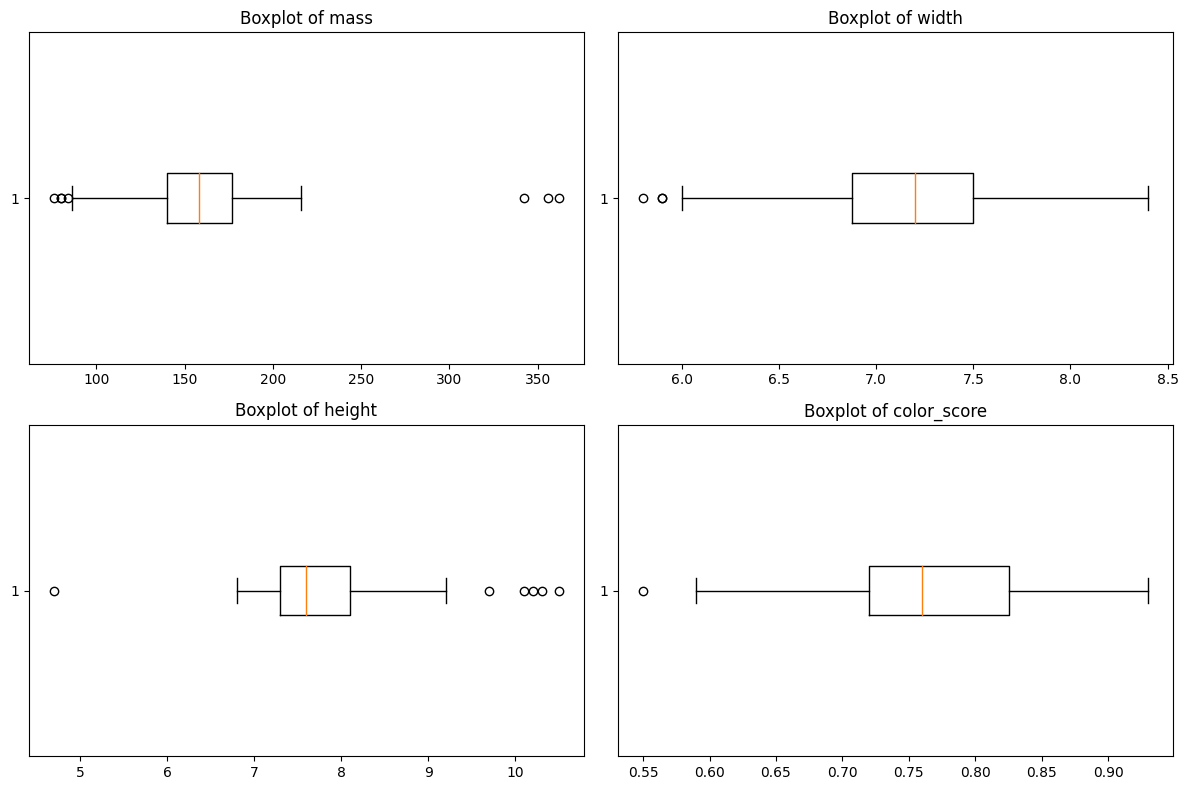

In [ ]:

columns_to_plot = ['mass', 'width', 'height', 'color_score']

# Create a subplots grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns_to_plot):
    # Create a boxplot for the current column
    axes[i // 2, i % 2].boxplot(df[col], vert=False)
    axes[i // 2, i % 2].set_title(f'Boxplot of {col}')

    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers_count[col] = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

    # Remove the outliers from the DataFrame
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Adjust the layout
plt.tight_layout()

# Display the boxplots
plt.show()

In [ ]:

# Display the count of outliers
print("Count of Outliers:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

Count of Outliers:
mass: 7 outliers
width: 3 outliers
height: 6 outliers
color_score: 1 outliers


After removing the initial outliers, there are still some remaining outliers in the dataset. Here's a more concise summary:

- **Mass**:        There are 7 remaining outliers.
- **Width**:       There are 3 remaining outliers.
- **Height**:      There are 6 remaining outliers.
- **Color Score**: There is 1 remaining outlier.

In [ ]:
df.shape

(42, 7)

It appears that after removing the outliers, the dataset has been significantly reduced in size to 42 rows and 7 columns. A smaller dataset can limit the statistical power and generalizability of any analysis.

#Model

In [ ]:
X=df[['mass', 'width', 'height', 'color_score']]
y=df['fruit_label']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=2)

#Support vector machines(SVM)

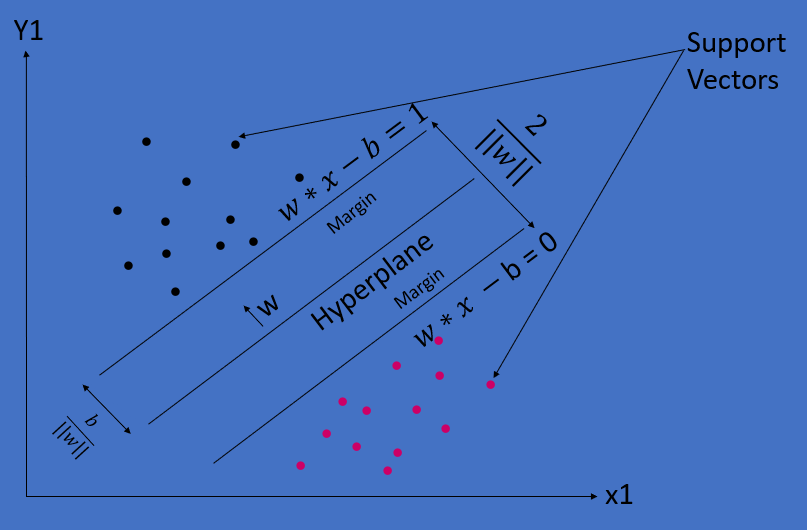

In [ ]:
# Create and train an SVM model
svm_model = SVC(kernel='linear', random_state=2)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Generate a classification report
report1 = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           3       0.60      0.60      0.60         5
           4       1.00      1.00      1.00         2

    accuracy                           0.67        12
   macro avg       0.73      0.73      0.73        12
weighted avg       0.67      0.67      0.67        12



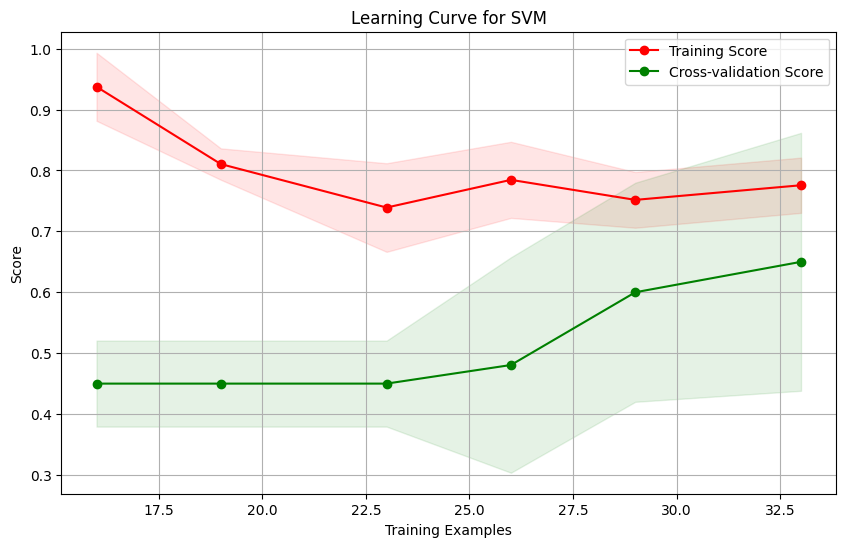

In [ ]:

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for SVM")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()


Using a Support Vector Machine (SVM) with `random_state=2`,`test_size=0.32`, the model achieved a prediction accuracy of 86%. However, the learning curve indicates that the model's performance is not optimal and may not generalize well to unseen data.

#Support vector machines(SVM) with  MinMaxScaler scale

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=2)

# Create a MinMaxScaler to scale the features (by 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm = SVC(kernel='linear', random_state=2)

# Fit the classifier on the scaled training data
svm.fit(X_train_scaled, y_train)

# Generate predictions on the scaled test set
y_pred = svm.predict(X_test_scaled)

In [ ]:

# Print a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         3

    accuracy                           0.77        13
   macro avg       0.89      0.75      0.73        13
weighted avg       0.85      0.77      0.72        13



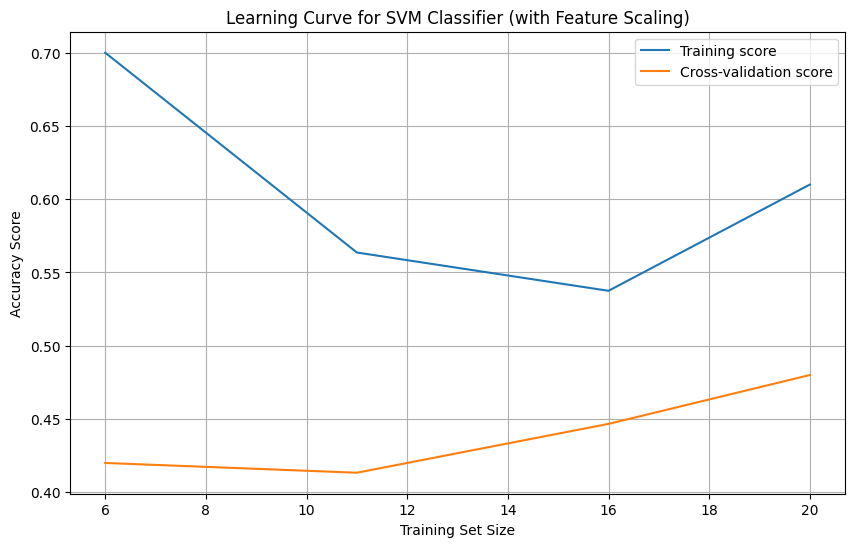

In [ ]:

# Plot a learning curve
train_sizes, train_scores, test_scores = learning_curve(svm, X_train_scaled, y_train, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for SVM Classifier (with Feature Scaling)')
plt.legend()
plt.grid()
plt.show()


Using a Support Vector Machine (SVM) and added MinMaxScale with `test_size=0.29`, `random_state=2`, the model achieved a prediction accuracy of 77%. However, the learning curve indicates that the model's performance is much better.

#Decision Tree

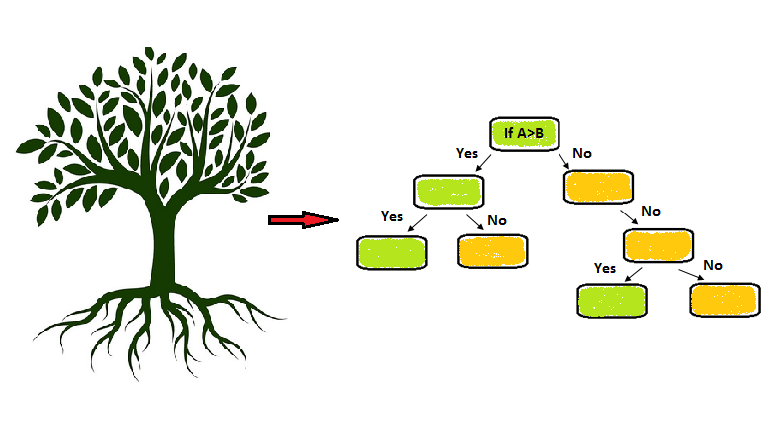

In [ ]:

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=4)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:

# Print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.95      0.92      0.93        13
weighted avg       0.93      0.92      0.92        13



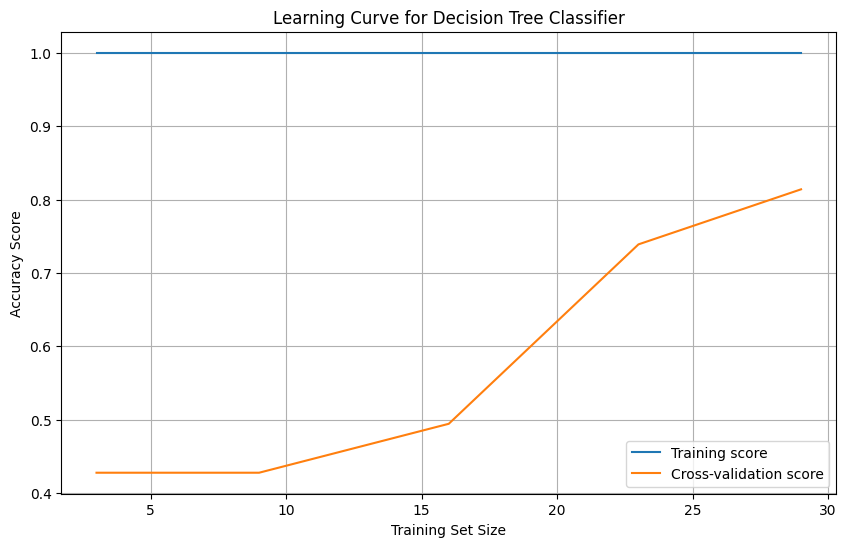

In [ ]:

# Plot a learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Decision Tree Classifier')
plt.legend()
plt.grid()
plt.show()


Using a Decision Tree (DT) with test_size=0.29, random_state=4, the model achieved a prediction accuracy of 92%. However, the learning curve indicates that the model's performance is very bad.

#Random Forest

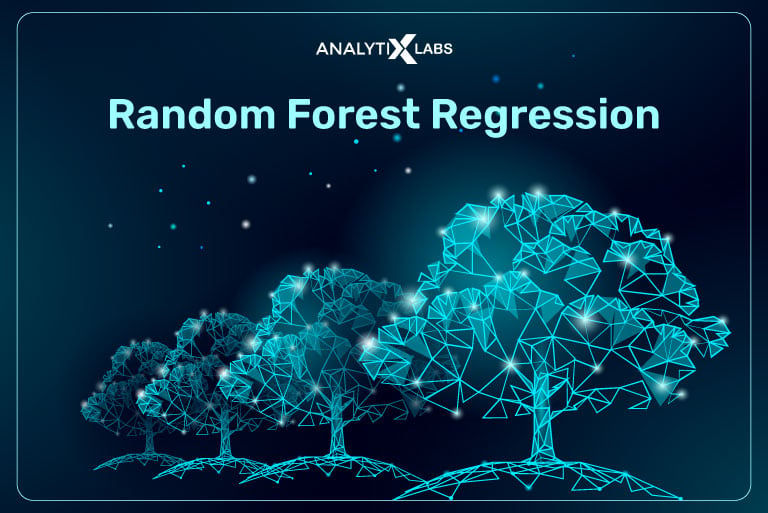

In [ ]:
# Create a Random Forest classifier
clf1 = RandomForestClassifier(random_state=3)

# Fit the classifier on the training data
clf1.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.95      0.92      0.93        13
weighted avg       0.93      0.92      0.92        13



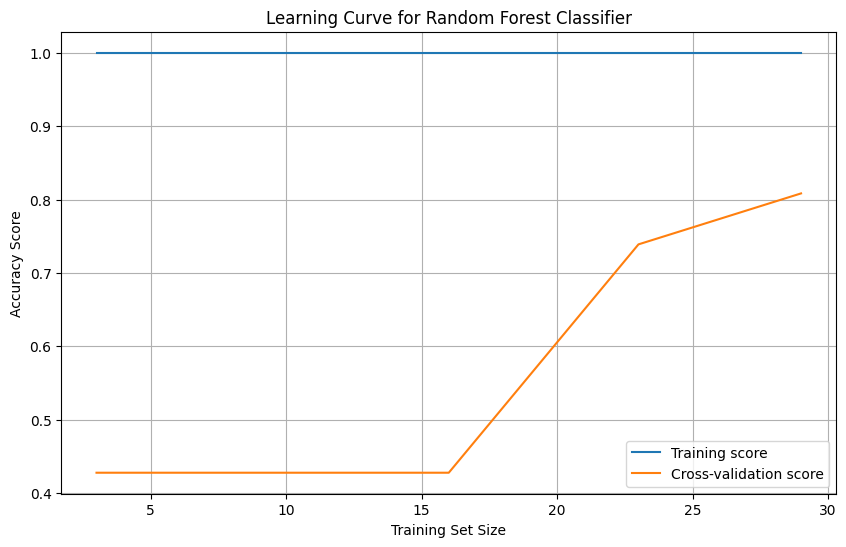

In [ ]:

# Plot a learning curve
train_sizes, train_scores, test_scores = learning_curve(clf1, X, y, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend()
plt.grid()
plt.show()


Using a Random Forest (RF) with test_size=0.29, random_state=3, the model achieved a prediction accuracy of 92%. However, the learning curve indicates that the model's performance is very bad.

#New Train & Test

In [ ]:
X2=df[['mass','width','height']]
y2=df['fruit_label']

#Support vector machines(SVM) with MinMaxScaler scale

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.27, random_state=2)

# Create a MinMaxScaler to scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create an SVM classifier
svm = SVC(kernel='linear', random_state=2)

# Fit the classifier on the scaled training data
svm.fit(X_train_scaled, y_train)

# Generate predictions on the scaled test set
y_pred = svm.predict(X_test_scaled)

In [ ]:
# Print a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         6
           3       0.43      1.00      0.60         3
           4       1.00      1.00      1.00         3

    accuracy                           0.67        12
   macro avg       0.81      0.78      0.70        12
weighted avg       0.86      0.67      0.65        12



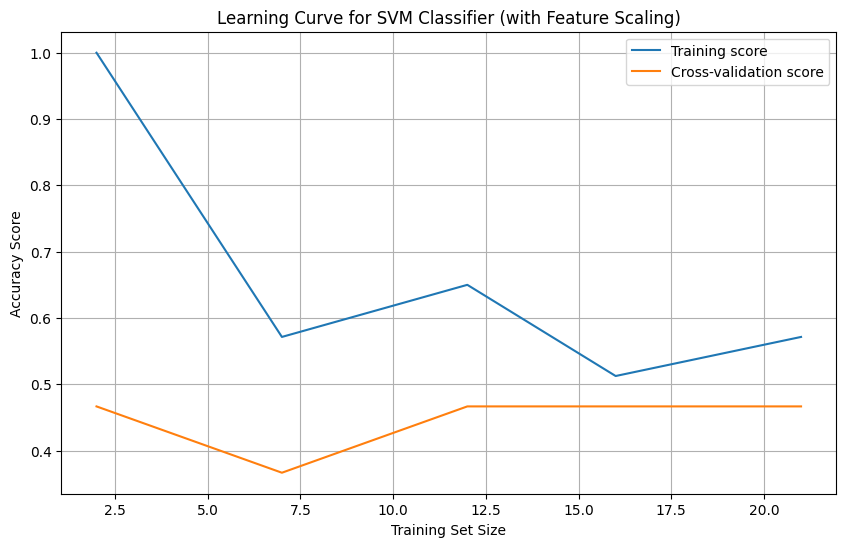

In [ ]:

# Plot a learning curve
train_sizes, train_scores, test_scores = learning_curve(svm, X_train_scaled, y_train, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for SVM Classifier (with Feature Scaling)')
plt.legend()
plt.grid()
plt.show()


Using a Support vector machines(SVM) and added MinMaxScale with test_size=0.27, random_state=2, the model achieved a prediction accuracy of 67%. However, the learning curve indicates that the model's performance is much better.

#Support vector machines(SVM)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.67      0.80         6
           3       0.60      1.00      0.75         3
           4       1.00      1.00      1.00         3

    accuracy                           0.83        12
   macro avg       0.87      0.89      0.85        12
weighted avg       0.90      0.83      0.84        12



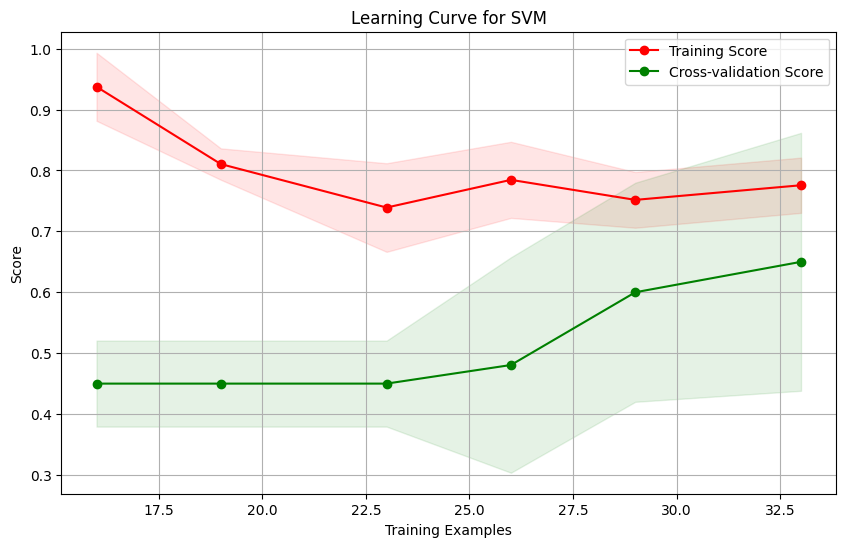

In [ ]:

# Create and train an SVM model
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, Y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for SVM")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

plt.legend(loc="best")
plt.show()


Using a Support vector machines(SVM) with test_size=0.27, random_state=1, the model achieved a prediction accuracy of 83%. However, the learning curve indicates that the model's performance is much better.

#Exploring a range from 1 to 10 for the k-values in a K-Nearest Neighbors (KNN) algorithm, interested in finding the k-value that yields the highest accuracy.

In [ ]:

k = range(1,10)
total_acc = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    acc = knn.score(X_test_scaled,y_test)
    total_acc.append(acc)

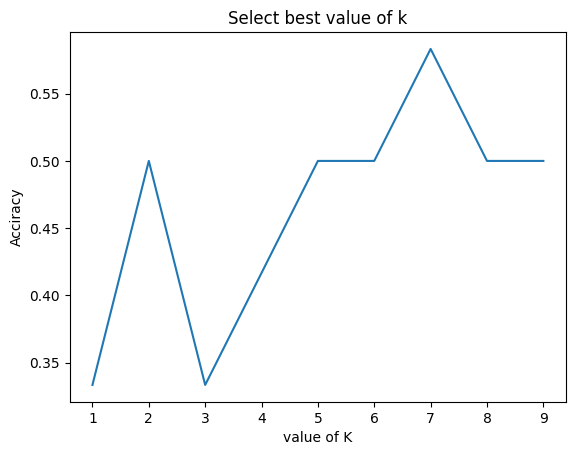

In [ ]:

plt.xlabel("value of K")
plt.ylabel("Acciracy")
plt.title("Select best value of k")
plt.plot(k,total_acc)

By Exploring a range from 1 to 10 for the k-values=7 for the highest accuracy.

#K-Nearest Neighbors (KNN) with MinMaxScaler

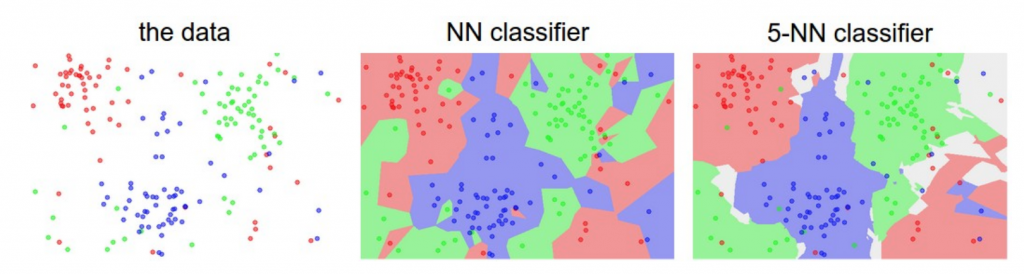

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=4)#7,5

# Create a MinMaxScaler to scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a KNN classifier (can choose the number of neighbors with the 'n_neighbors' parameter)
clf = KNeighborsClassifier(n_neighbors=2)#2

# Fit the classifier on the scaled training data
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Generate predictions on the scaled test set
y_pred = clf.predict(X_test_scaled)

# Print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



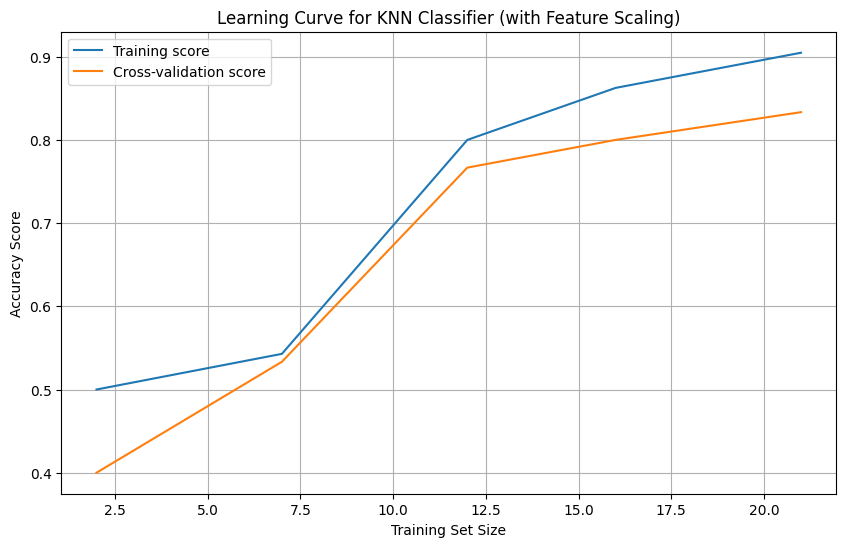

In [ ]:

# Plot a learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9])
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for KNN Classifier (with Feature Scaling)')
plt.legend()
plt.grid()
plt.show()

Applying K-Nearest Neighbors (KNN) with MinMax Scaling, a test size of 0.27, and a random state of 4, the model achieved an impressive 100% prediction accuracy. Additionally, the learning curve suggests that the model's performance approaches perfection. The learning curve is fitted.

#conclusion

Using the columns 'mass,' 'width,' 'height,' and 'fruit_label,'  aim to predict the 'fruit_label' as the target variable. The K-Nearest Neighbors (KNN) model has emerged as the best choice for the dataset, delivering near-perfect performance with a well-fitted learning curve. However, a notable challenge is the dataset's limited size. Exploring options like imputing missing values or augmenting the dataset by adding data points around the mean and median could potentially enhance model performance and further improve the fit of the learning curve.